In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *

In [128]:
def f(x, y):
    return np.sin((x ** 2 + y ** 2))

x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

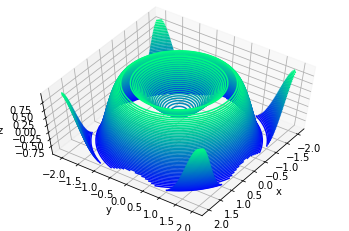

In [129]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='winter')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(60, 35)

In [147]:
def find_direction(X0, Y0, lr):
    results_z = []
    results_xy = []
    for step_x in [0, lr, -lr]:
        for step_y in [0, lr, -lr]:
            results_z.append(f(X0 + step_x, Y0 + step_y))
            results_xy.append([X0 + step_x, Y0 + step_y])
    min_idx = results_z.index(min(results_z))
    return results_xy[min_idx]

In [167]:
max_iter = 300
lr = 0.01
X0 = 0
Y0 = -1
cur_iter = 0
steps_x = [X0]
steps_y = [Y0]
steps_z = [f(X0, Y0)]

while True:
    # get closer to a local min
    X1, Y1 = find_direction(X0, Y0, lr)
    # save step
    steps_x.append(X1)
    steps_y.append(Y1)
    steps_z.append(f(X1, Y1))
    # calculate step size
    step_size_x = abs(X0 - X1)
    step_size_y = abs(Y0 - Y1)
    # save new step
    X0 = X1
    Y0 = Y1
    if cur_iter > max_iter:
        print("Max iter reached")
        break
    if step_size_x < 0.00001 and step_size_y < 0.00001:
        print("Local min reached")
        break
    elif cur_iter%20 == 0:
        print("Iteration {} has x value ({},{})".format(cur_iter, X1, Y1))
    cur_iter = cur_iter + 1
        
    
print("The local minimum occurs at", X1, Y1)

Iteration 0 has x value (0,-0.99)
Iteration 20 has x value (0,-0.7899999999999998)
Iteration 40 has x value (0,-0.5899999999999996)
Iteration 60 has x value (0,-0.38999999999999946)
Iteration 80 has x value (0,-0.18999999999999928)
Local min reached
The local minimum occurs at 0 7.528699885739343e-16


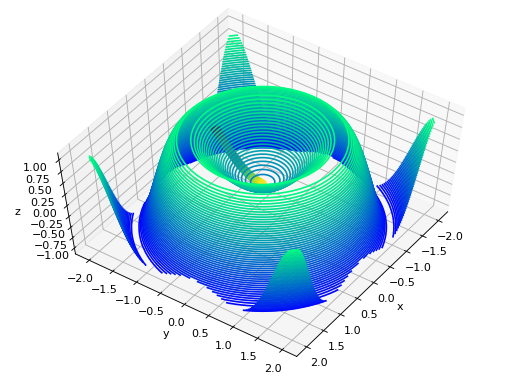

In [187]:
fig = plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection='3d')
color = [item/255 for item in list(range(len(steps_x)))]
ax.scatter(steps_x, steps_y, steps_z, s=50, c=color)
ax.contour3D(X, Y, Z, 50, cmap='winter')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(60, 35)